## Importing the Dataset

In [1]:
import pandas as pd

# Path to the Excel file
# NOTE: File_path should be the file path where you store the dataset
file_path = "./CAC 40 Historical Data.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

# Display the sampled DataFrame
df

Date    Price     Open     High      Low     Vol.  Change %
0    2024-07-16  7580.03  7583.50  7603.42  7556.55   41.90M   -0.0069
1    2024-07-15  7632.71  7682.34  7712.85  7618.73   50.57M   -0.0119
2    2024-07-12  7724.32  7664.94  7737.16  7659.09   51.47M    0.0127
3    2024-07-11  7627.13  7613.09  7645.98  7577.00   56.79M    0.0071
4    2024-07-10  7573.55  7525.18  7580.12  7487.39   54.98M    0.0086
...         ...      ...      ...      ...      ...      ...       ...
2556 2014-07-23  4376.32  4360.20  4396.70  4356.30   85.00M    0.0016
2557 2014-07-22  4369.52  4323.71  4373.70  4315.66   99.48M    0.0150
2558 2014-07-21  4304.74  4334.62  4336.79  4295.36   78.39M   -0.0071
2559 2014-07-18  4335.31  4296.84  4335.31  4284.42  111.18M    0.0044
2560 2014-07-17  4316.12  4345.98  4362.28  4311.12  102.51M   -0.0121

[2561 rows x 7 columns]

## Get to know the Data types

In [2]:
df.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %           float64
dtype: object

## Splitting the Date column to Year, Month, Day, Unique_ID & Day Name of the week
For Data Analysis purposes

In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extracting Year, Month, and Day from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['unique_id'] = range(len(df), 0, -1)

# Adding 'Day name' where 0 is Sunday and 6 is Saturday
df['Day name'] = df['Date'].dt.dayofweek.apply(lambda x: (x+2) % 7)

# Displaying the DataFrame to verify the new columns
df

Date    Price     Open     High      Low     Vol.  Change %  Year  \
0    2024-07-16  7580.03  7583.50  7603.42  7556.55   41.90M   -0.0069  2024   
1    2024-07-15  7632.71  7682.34  7712.85  7618.73   50.57M   -0.0119  2024   
2    2024-07-12  7724.32  7664.94  7737.16  7659.09   51.47M    0.0127  2024   
3    2024-07-11  7627.13  7613.09  7645.98  7577.00   56.79M    0.0071  2024   
4    2024-07-10  7573.55  7525.18  7580.12  7487.39   54.98M    0.0086  2024   
...         ...      ...      ...      ...      ...      ...       ...   ...   
2556 2014-07-23  4376.32  4360.20  4396.70  4356.30   85.00M    0.0016  2014   
2557 2014-07-22  4369.52  4323.71  4373.70  4315.66   99.48M    0.0150  2014   
2558 2014-07-21  4304.74  4334.62  4336.79  4295.36   78.39M   -0.0071  2014   
2559 2014-07-18  4335.31  4296.84  4335.31  4284.42  111.18M    0.0044  2014   
2560 2014-07-17  4316.12  4345.98  4362.28  4311.12  102.51M   -0.0121  2014   

      Month  Day  unique_id  Day name  
0         7   16       2561         3  
1         7   15       2560         2  
2         7   12       2559         6  
3         7   11       2558         5  
4         7   10       2557         4  
...     ...  ...        ...       ...  
2556      7   23          5         4  
2557      7   22          4         3  
2558      7   21          3         2  
2559      7   18          2         6  
2560      7   17          1         5  

[2561 rows x 12 columns]

## Making the price column to the most right for commmon standards

In [4]:
df_cp = df['Price']
# Drop the "Closing Price" column
df = df.drop('Price', axis=1)

# Create the "Date" column in "yyyy-mm-dd" format
# df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Rejoin the "Closing Price" column (assuming you have it in another DataFrame)
closing_prices_df = pd.DataFrame(df_cp)
df = df.join(closing_prices_df)
df

Date     Open     High      Low     Vol.  Change %  Year  Month  \
0    2024-07-16  7583.50  7603.42  7556.55   41.90M   -0.0069  2024      7   
1    2024-07-15  7682.34  7712.85  7618.73   50.57M   -0.0119  2024      7   
2    2024-07-12  7664.94  7737.16  7659.09   51.47M    0.0127  2024      7   
3    2024-07-11  7613.09  7645.98  7577.00   56.79M    0.0071  2024      7   
4    2024-07-10  7525.18  7580.12  7487.39   54.98M    0.0086  2024      7   
...         ...      ...      ...      ...      ...       ...   ...    ...   
2556 2014-07-23  4360.20  4396.70  4356.30   85.00M    0.0016  2014      7   
2557 2014-07-22  4323.71  4373.70  4315.66   99.48M    0.0150  2014      7   
2558 2014-07-21  4334.62  4336.79  4295.36   78.39M   -0.0071  2014      7   
2559 2014-07-18  4296.84  4335.31  4284.42  111.18M    0.0044  2014      7   
2560 2014-07-17  4345.98  4362.28  4311.12  102.51M   -0.0121  2014      7   

      Day  unique_id  Day name    Price  
0      16       2561         3  7580.03  
1      15       2560         2  7632.71  
2      12       2559         6  7724.32  
3      11       2558         5  7627.13  
4      10       2557         4  7573.55  
...   ...        ...       ...      ...  
2556   23          5         4  4376.32  
2557   22          4         3  4369.52  
2558   21          3         2  4304.74  
2559   18          2         6  4335.31  
2560   17          1         5  4316.12  

[2561 rows x 12 columns]

## Ensuring the data is sorted

In [5]:
# Sort the DataFrame by "Date" column in descending order
df = df.sort_values(by='Date', ascending=False)

# Print the sorted DataFrame
df

Date     Open     High      Low     Vol.  Change %  Year  Month  \
0    2024-07-16  7583.50  7603.42  7556.55   41.90M   -0.0069  2024      7   
1    2024-07-15  7682.34  7712.85  7618.73   50.57M   -0.0119  2024      7   
2    2024-07-12  7664.94  7737.16  7659.09   51.47M    0.0127  2024      7   
3    2024-07-11  7613.09  7645.98  7577.00   56.79M    0.0071  2024      7   
4    2024-07-10  7525.18  7580.12  7487.39   54.98M    0.0086  2024      7   
...         ...      ...      ...      ...      ...       ...   ...    ...   
2556 2014-07-23  4360.20  4396.70  4356.30   85.00M    0.0016  2014      7   
2557 2014-07-22  4323.71  4373.70  4315.66   99.48M    0.0150  2014      7   
2558 2014-07-21  4334.62  4336.79  4295.36   78.39M   -0.0071  2014      7   
2559 2014-07-18  4296.84  4335.31  4284.42  111.18M    0.0044  2014      7   
2560 2014-07-17  4345.98  4362.28  4311.12  102.51M   -0.0121  2014      7   

      Day  unique_id  Day name    Price  
0      16       2561         3  7580.03  
1      15       2560         2  7632.71  
2      12       2559         6  7724.32  
3      11       2558         5  7627.13  
4      10       2557         4  7573.55  
...   ...        ...       ...      ...  
2556   23          5         4  4376.32  
2557   22          4         3  4369.52  
2558   21          3         2  4304.74  
2559   18          2         6  4335.31  
2560   17          1         5  4316.12  

[2561 rows x 12 columns]

## Creating a continuous data range for time-series model

In [6]:
# Assuming df is your DataFrame
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format
df.set_index('Date', inplace=True)

# Create a continuous date range from min to max date in the dataset
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

df.reset_index(inplace=True)
df

Date     Open     High      Low     Vol.  Change %  Year  Month  \
0    2024-07-16  7583.50  7603.42  7556.55   41.90M   -0.0069  2024      7   
1    2024-07-15  7682.34  7712.85  7618.73   50.57M   -0.0119  2024      7   
2    2024-07-12  7664.94  7737.16  7659.09   51.47M    0.0127  2024      7   
3    2024-07-11  7613.09  7645.98  7577.00   56.79M    0.0071  2024      7   
4    2024-07-10  7525.18  7580.12  7487.39   54.98M    0.0086  2024      7   
...         ...      ...      ...      ...      ...       ...   ...    ...   
2556 2014-07-23  4360.20  4396.70  4356.30   85.00M    0.0016  2014      7   
2557 2014-07-22  4323.71  4373.70  4315.66   99.48M    0.0150  2014      7   
2558 2014-07-21  4334.62  4336.79  4295.36   78.39M   -0.0071  2014      7   
2559 2014-07-18  4296.84  4335.31  4284.42  111.18M    0.0044  2014      7   
2560 2014-07-17  4345.98  4362.28  4311.12  102.51M   -0.0121  2014      7   

      Day  unique_id  Day name    Price  
0      16       2561         3  7580.03  
1      15       2560         2  7632.71  
2      12       2559         6  7724.32  
3      11       2558         5  7627.13  
4      10       2557         4  7573.55  
...   ...        ...       ...      ...  
2556   23          5         4  4376.32  
2557   22          4         3  4369.52  
2558   21          3         2  4304.74  
2559   18          2         6  4335.31  
2560   17          1         5  4316.12  

[2561 rows x 12 columns]

## Data Interpolation 
As the stock market exchange are empty for holidays

In [7]:
import numpy as np
from scipy.interpolate import Akima1DInterpolator

# Assuming 'df' is already defined and includes a 'Date' and 'Closing Price' column
df.set_index('Date', inplace=True)

# Create a continuous date range from min to max date in the dataset
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

# Reindex the dataframe with the full date range, filling non-existing dates with NaNs
data_full = df.reindex(date_range)

# Prepare data for interpolation
# Dropping NaNs because Akima interpolation cannot handle NaNs directly
x = np.arange(len(data_full))
y = data_full['Price'].values
mask = ~np.isnan(y)
x, y = x[mask], y[mask]

# Create an Akima interpolator
akima_interpolator = Akima1DInterpolator(x, y)

# Interpolate the results for the full range
data_full['y'] = akima_interpolator(np.arange(len(data_full)))

# Generate a list of columns to forward fill, excluding 'Date' and 'Price'
# 'Date' is not listed as it's the index, and 'Price' is explicitly handled above
columns_to_ffill = [col for col in df.columns if col not in ['Price']]

# Forward fill the other columns where applicable
data_full[columns_to_ffill] = data_full[columns_to_ffill].ffill()

# Save or display the result
# data_full.to_excel('Interpolated_Data.xlsx')
print(data_full.head())


               Open     High      Low     Vol.  Change %    Year  Month   Day  \
2014-07-17  4345.98  4362.28  4311.12  102.51M   -0.0121  2014.0    7.0  17.0   
2014-07-18  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0  18.0   
2014-07-19  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0  18.0   
2014-07-20  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0  18.0   
2014-07-21  4334.62  4336.79  4295.36   78.39M   -0.0071  2014.0    7.0  21.0   

            unique_id  Day name    Price            y  
2014-07-17        1.0       5.0  4316.12  4316.120000  
2014-07-18        2.0       6.0  4335.31  4335.310000  
2014-07-19        2.0       6.0      NaN  4328.898412  
2014-07-20        2.0       6.0      NaN  4308.414831  
2014-07-21        3.0       2.0  4304.74  4304.740000  


In [8]:
data_full = data_full.drop('Price', axis = 1)
data_full

Open     High      Low     Vol.  Change %    Year  Month   Day  \
2014-07-17  4345.98  4362.28  4311.12  102.51M   -0.0121  2014.0    7.0  17.0   
2014-07-18  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0  18.0   
2014-07-19  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0  18.0   
2014-07-20  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0  18.0   
2014-07-21  4334.62  4336.79  4295.36   78.39M   -0.0071  2014.0    7.0  21.0   
...             ...      ...      ...      ...       ...     ...    ...   ...   
2024-07-12  7664.94  7737.16  7659.09   51.47M    0.0127  2024.0    7.0  12.0   
2024-07-13  7664.94  7737.16  7659.09   51.47M    0.0127  2024.0    7.0  12.0   
2024-07-14  7664.94  7737.16  7659.09   51.47M    0.0127  2024.0    7.0  12.0   
2024-07-15  7682.34  7712.85  7618.73   50.57M   -0.0119  2024.0    7.0  15.0   
2024-07-16  7583.50  7603.42  7556.55   41.90M   -0.0069  2024.0    7.0  16.0   

            unique_id  Day name            y  
2014-07-17        1.0       5.0  4316.120000  
2014-07-18        2.0       6.0  4335.310000  
2014-07-19        2.0       6.0  4328.898412  
2014-07-20        2.0       6.0  4308.414831  
2014-07-21        3.0       2.0  4304.740000  
...               ...       ...          ...  
2024-07-12     2559.0       6.0  7724.320000  
2024-07-13     2559.0       6.0  7717.094233  
2024-07-14     2559.0       6.0  7681.192667  
2024-07-15     2560.0       2.0  7632.710000  
2024-07-16     2561.0       3.0  7580.030000  

[3653 rows x 11 columns]

In [9]:
data_full.reset_index(inplace=True)
data_full.rename(columns={'index': 'Date'}, inplace=True)

# Convert the 'Date' column to datetime type if it's not already
data_full['Date'] = pd.to_datetime(data_full['Date'])
# data_full['Price'] = data_full['Price'].str.replace('.', '').str.replace(',', '.').astype(float)
data_full

Date     Open     High      Low     Vol.  Change %    Year  Month  \
0    2014-07-17  4345.98  4362.28  4311.12  102.51M   -0.0121  2014.0    7.0   
1    2014-07-18  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0   
2    2014-07-19  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0   
3    2014-07-20  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0   
4    2014-07-21  4334.62  4336.79  4295.36   78.39M   -0.0071  2014.0    7.0   
...         ...      ...      ...      ...      ...       ...     ...    ...   
3648 2024-07-12  7664.94  7737.16  7659.09   51.47M    0.0127  2024.0    7.0   
3649 2024-07-13  7664.94  7737.16  7659.09   51.47M    0.0127  2024.0    7.0   
3650 2024-07-14  7664.94  7737.16  7659.09   51.47M    0.0127  2024.0    7.0   
3651 2024-07-15  7682.34  7712.85  7618.73   50.57M   -0.0119  2024.0    7.0   
3652 2024-07-16  7583.50  7603.42  7556.55   41.90M   -0.0069  2024.0    7.0   

       Day  unique_id  Day name            y  
0     17.0        1.0       5.0  4316.120000  
1     18.0        2.0       6.0  4335.310000  
2     18.0        2.0       6.0  4328.898412  
3     18.0        2.0       6.0  4308.414831  
4     21.0        3.0       2.0  4304.740000  
...    ...        ...       ...          ...  
3648  12.0     2559.0       6.0  7724.320000  
3649  12.0     2559.0       6.0  7717.094233  
3650  12.0     2559.0       6.0  7681.192667  
3651  15.0     2560.0       2.0  7632.710000  
3652  16.0     2561.0       3.0  7580.030000  

[3653 rows x 12 columns]

## Reset Unique ID

In [10]:
def reset_unique_id(df):
    # Calculating the total number of rows
    total_rows = df.shape[0]

    # Creating a range from 1 to total_rows
    sequential_unique_id = range(1, total_rows + 1)

    # Assigning the range to the 'unique_id' column
    df['unique_id'] = sequential_unique_id
    return df

# Apply the function to your DataFrame
data_full = reset_unique_id(data_full)
df = reset_unique_id(df)
data_full

Date     Open     High      Low     Vol.  Change %    Year  Month  \
0    2014-07-17  4345.98  4362.28  4311.12  102.51M   -0.0121  2014.0    7.0   
1    2014-07-18  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0   
2    2014-07-19  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0   
3    2014-07-20  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0   
4    2014-07-21  4334.62  4336.79  4295.36   78.39M   -0.0071  2014.0    7.0   
...         ...      ...      ...      ...      ...       ...     ...    ...   
3648 2024-07-12  7664.94  7737.16  7659.09   51.47M    0.0127  2024.0    7.0   
3649 2024-07-13  7664.94  7737.16  7659.09   51.47M    0.0127  2024.0    7.0   
3650 2024-07-14  7664.94  7737.16  7659.09   51.47M    0.0127  2024.0    7.0   
3651 2024-07-15  7682.34  7712.85  7618.73   50.57M   -0.0119  2024.0    7.0   
3652 2024-07-16  7583.50  7603.42  7556.55   41.90M   -0.0069  2024.0    7.0   

       Day  unique_id  Day name            y  
0     17.0          1       5.0  4316.120000  
1     18.0          2       6.0  4335.310000  
2     18.0          3       6.0  4328.898412  
3     18.0          4       6.0  4308.414831  
4     21.0          5       2.0  4304.740000  
...    ...        ...       ...          ...  
3648  12.0       3649       6.0  7724.320000  
3649  12.0       3650       6.0  7717.094233  
3650  12.0       3651       6.0  7681.192667  
3651  15.0       3652       2.0  7632.710000  
3652  16.0       3653       3.0  7580.030000  

[3653 rows x 12 columns]

## Reset Index

In [11]:
# # Reset the index without dropping it
df = df.reset_index(drop=False)

# Rename the 'index' column to 'ds'
df.rename(columns={'Date': 'ds'}, inplace=True)
data_full.rename(columns={'Date': 'ds'}, inplace=True)
df

ds     Open     High      Low     Vol.  Change %  Year  Month  \
0    2024-07-16  7583.50  7603.42  7556.55   41.90M   -0.0069  2024      7   
1    2024-07-15  7682.34  7712.85  7618.73   50.57M   -0.0119  2024      7   
2    2024-07-12  7664.94  7737.16  7659.09   51.47M    0.0127  2024      7   
3    2024-07-11  7613.09  7645.98  7577.00   56.79M    0.0071  2024      7   
4    2024-07-10  7525.18  7580.12  7487.39   54.98M    0.0086  2024      7   
...         ...      ...      ...      ...      ...       ...   ...    ...   
2556 2014-07-23  4360.20  4396.70  4356.30   85.00M    0.0016  2014      7   
2557 2014-07-22  4323.71  4373.70  4315.66   99.48M    0.0150  2014      7   
2558 2014-07-21  4334.62  4336.79  4295.36   78.39M   -0.0071  2014      7   
2559 2014-07-18  4296.84  4335.31  4284.42  111.18M    0.0044  2014      7   
2560 2014-07-17  4345.98  4362.28  4311.12  102.51M   -0.0121  2014      7   

      Day  unique_id  Day name    Price  
0      16          1         3  7580.03  
1      15          2         2  7632.71  
2      12          3         6  7724.32  
3      11          4         5  7627.13  
4      10          5         4  7573.55  
...   ...        ...       ...      ...  
2556   23       2557         4  4376.32  
2557   22       2558         3  4369.52  
2558   21       2559         2  4304.74  
2559   18       2560         6  4335.31  
2560   17       2561         5  4316.12  

[2561 rows x 12 columns]

## Changing the price column to y column due to ML Model requirement

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime and rename the columns to comply with the library's expectations
df.rename(columns={'Price': 'y'}, inplace=True)

df

ds     Open     High      Low     Vol.  Change %  Year  Month  \
0    2024-07-16  7583.50  7603.42  7556.55   41.90M   -0.0069  2024      7   
1    2024-07-15  7682.34  7712.85  7618.73   50.57M   -0.0119  2024      7   
2    2024-07-12  7664.94  7737.16  7659.09   51.47M    0.0127  2024      7   
3    2024-07-11  7613.09  7645.98  7577.00   56.79M    0.0071  2024      7   
4    2024-07-10  7525.18  7580.12  7487.39   54.98M    0.0086  2024      7   
...         ...      ...      ...      ...      ...       ...   ...    ...   
2556 2014-07-23  4360.20  4396.70  4356.30   85.00M    0.0016  2014      7   
2557 2014-07-22  4323.71  4373.70  4315.66   99.48M    0.0150  2014      7   
2558 2014-07-21  4334.62  4336.79  4295.36   78.39M   -0.0071  2014      7   
2559 2014-07-18  4296.84  4335.31  4284.42  111.18M    0.0044  2014      7   
2560 2014-07-17  4345.98  4362.28  4311.12  102.51M   -0.0121  2014      7   

      Day  unique_id  Day name        y  
0      16          1         3  7580.03  
1      15          2         2  7632.71  
2      12          3         6  7724.32  
3      11          4         5  7627.13  
4      10          5         4  7573.55  
...   ...        ...       ...      ...  
2556   23       2557         4  4376.32  
2557   22       2558         3  4369.52  
2558   21       2559         2  4304.74  
2559   18       2560         6  4335.31  
2560   17       2561         5  4316.12  

[2561 rows x 12 columns]

In [13]:
df.dtypes

ds           datetime64[ns]
Open                float64
High                float64
Low                 float64
Vol.                 object
Change %            float64
Year                  int32
Month                 int32
Day                   int32
unique_id             int64
Day name              int64
y                   float64
dtype: object

In [14]:
data_full.dtypes

ds           datetime64[ns]
Open                float64
High                float64
Low                 float64
Vol.                 object
Change %            float64
Year                float64
Month               float64
Day                 float64
unique_id             int64
Day name            float64
y                   float64
dtype: object

In [15]:
data_full

ds     Open     High      Low     Vol.  Change %    Year  Month  \
0    2014-07-17  4345.98  4362.28  4311.12  102.51M   -0.0121  2014.0    7.0   
1    2014-07-18  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0   
2    2014-07-19  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0   
3    2014-07-20  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0   
4    2014-07-21  4334.62  4336.79  4295.36   78.39M   -0.0071  2014.0    7.0   
...         ...      ...      ...      ...      ...       ...     ...    ...   
3648 2024-07-12  7664.94  7737.16  7659.09   51.47M    0.0127  2024.0    7.0   
3649 2024-07-13  7664.94  7737.16  7659.09   51.47M    0.0127  2024.0    7.0   
3650 2024-07-14  7664.94  7737.16  7659.09   51.47M    0.0127  2024.0    7.0   
3651 2024-07-15  7682.34  7712.85  7618.73   50.57M   -0.0119  2024.0    7.0   
3652 2024-07-16  7583.50  7603.42  7556.55   41.90M   -0.0069  2024.0    7.0   

       Day  unique_id  Day name            y  
0     17.0          1       5.0  4316.120000  
1     18.0          2       6.0  4335.310000  
2     18.0          3       6.0  4328.898412  
3     18.0          4       6.0  4308.414831  
4     21.0          5       2.0  4304.740000  
...    ...        ...       ...          ...  
3648  12.0       3649       6.0  7724.320000  
3649  12.0       3650       6.0  7717.094233  
3650  12.0       3651       6.0  7681.192667  
3651  15.0       3652       2.0  7632.710000  
3652  16.0       3653       3.0  7580.030000  

[3653 rows x 12 columns]

## EDA (Exploratory Data Analysis)

## Plots

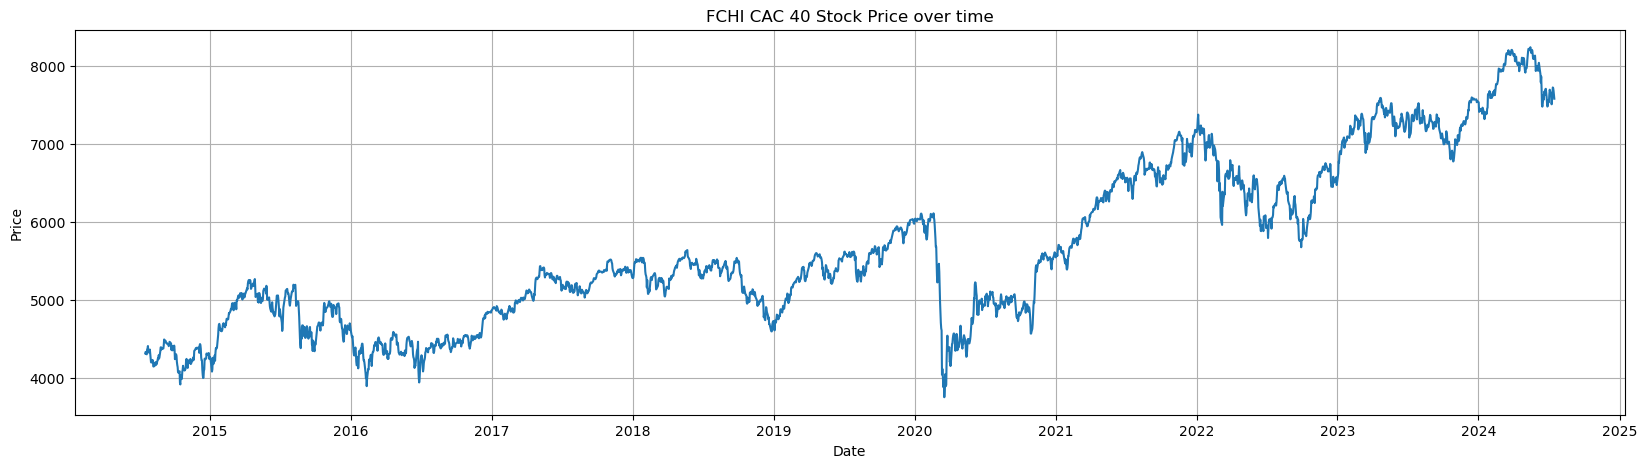

In [16]:
plt.figure(figsize=(20, 5))
plt.plot(data_full.ds, data_full['y'])  # Plotting the data
plt.title('FCHI CAC 40 Stock Price over time')
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(True)
plt.show()

C:\Users\Imman\Documents\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


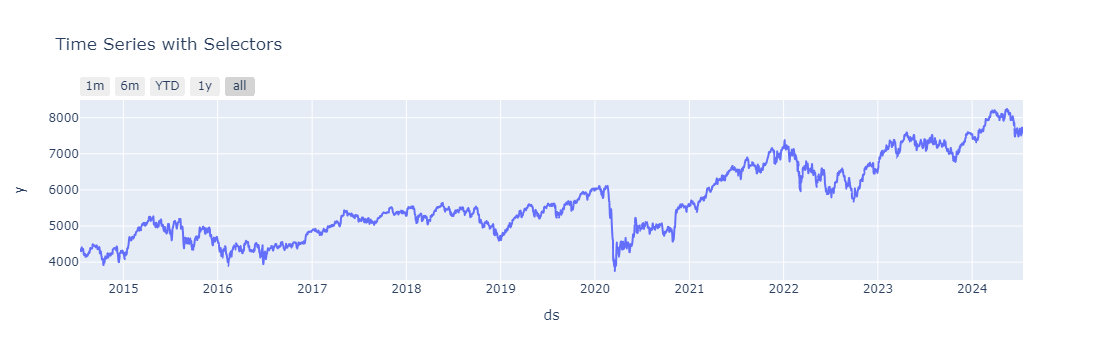

In [17]:
import plotly.express as px
import plotly.graph_objects as go
# A pro technique would be to use plotly for interactive visual and time selectors

fig = px.line(data_full, x='ds', y='y', title='Time Series with Selectors')

fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [18]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data_full['y'])

#Ho: Data is non stationary
#H1: Data is stationary

def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(data_full['y'])

ADF Test Statistic : -1.333709419104089
p-value : 0.6136126313939971
#Lags Used : 1
Number of Observations Used : 3651
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Multivariate Decomposition

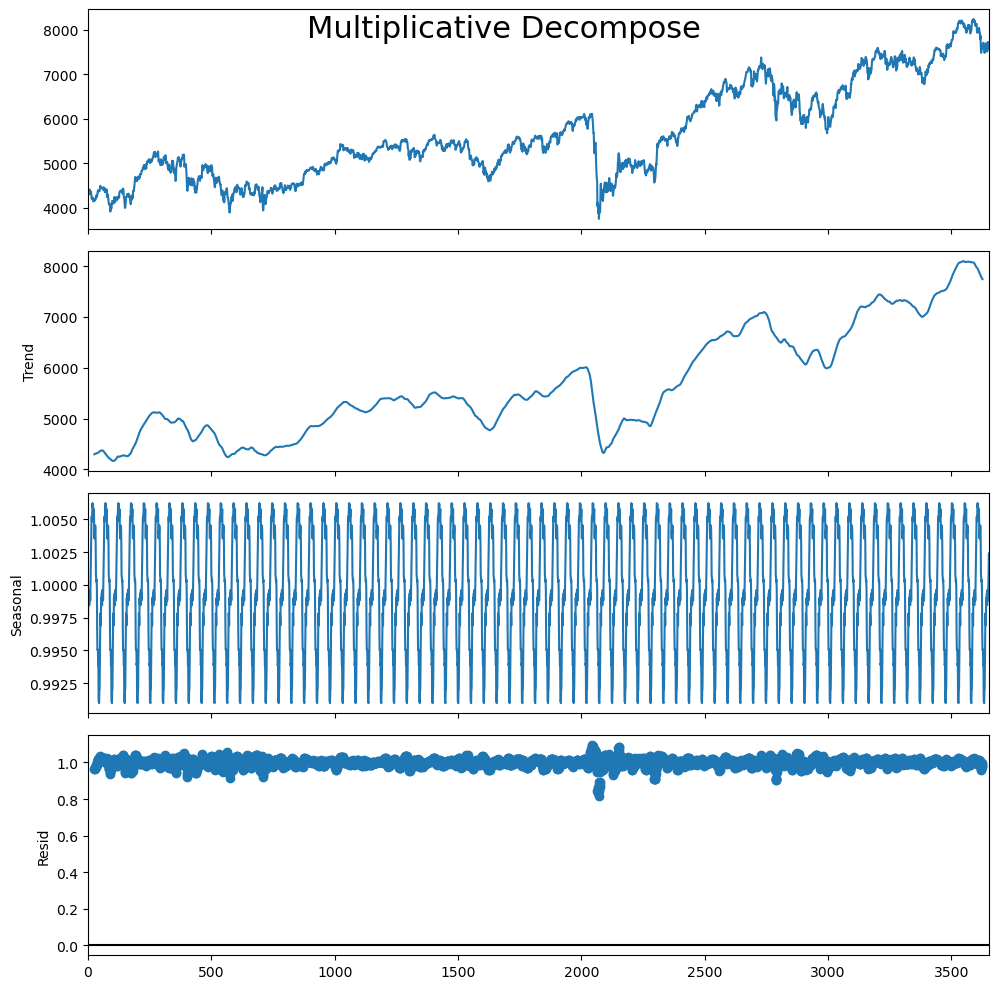

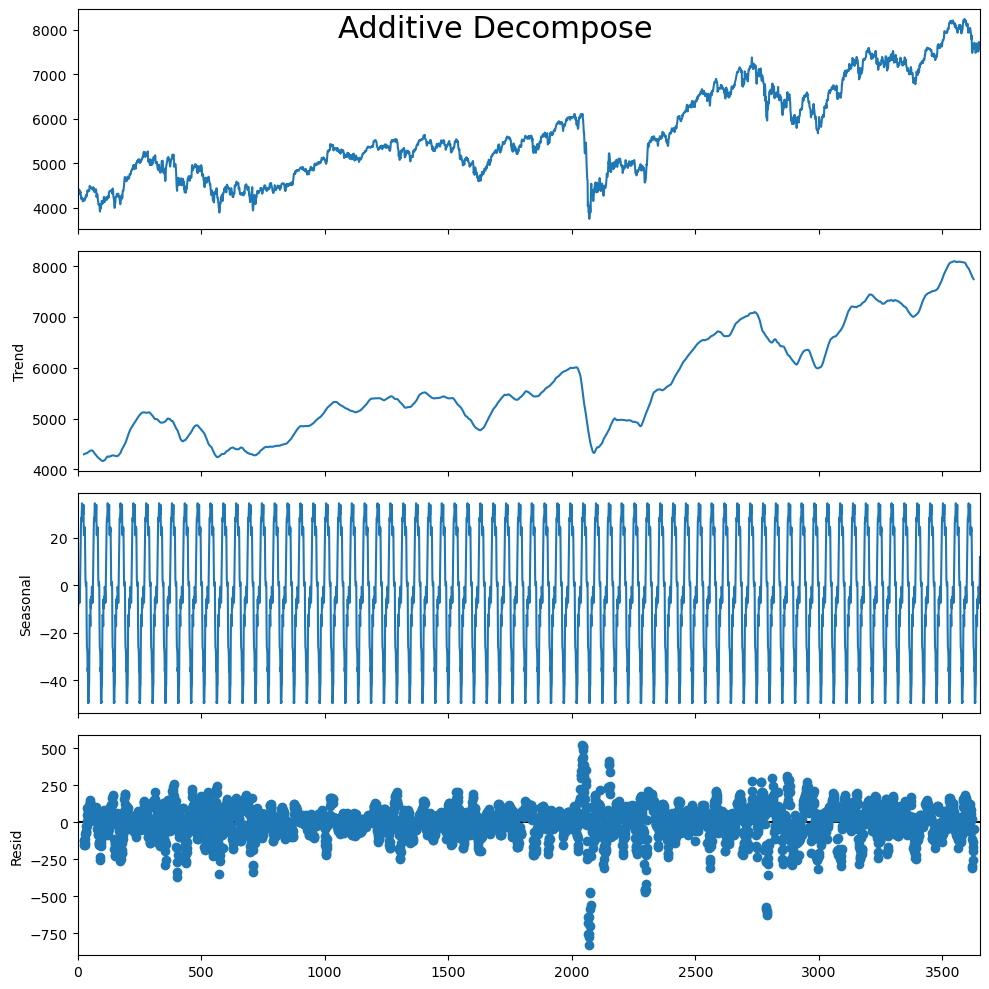

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams.update({'figure.figsize': (10,10)})
y = data_full['y'].to_frame()


# Multiplicative Decomposition 
result_mul = seasonal_decompose(y, model='multiplicative',period = 52)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive',period = 52)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

## Shift by 1 day plot

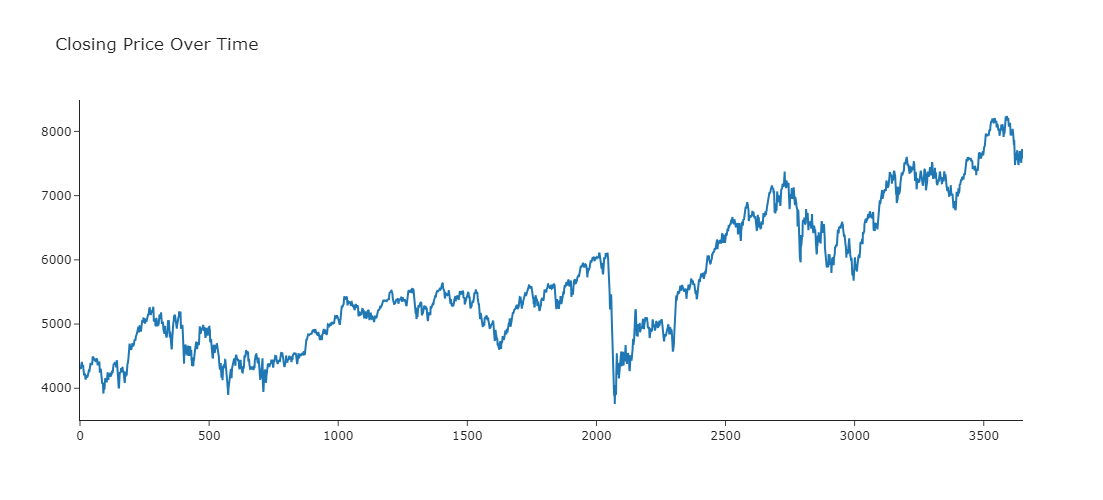

In [20]:
data_full['y_diff']=data_full['y']-data_full['y'].shift(1)

import plotly.graph_objects as go
fig = go.Figure([go.Scatter(x=data_full.index,y=data_full.y)])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='Closing Price Over Time ')
fig.show()

## De-shift & normalize the data

In [21]:
data_full = data_full.drop('y_diff', axis=1)
data_full

ds     Open     High      Low     Vol.  Change %    Year  Month  \
0    2014-07-17  4345.98  4362.28  4311.12  102.51M   -0.0121  2014.0    7.0   
1    2014-07-18  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0   
2    2014-07-19  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0   
3    2014-07-20  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0   
4    2014-07-21  4334.62  4336.79  4295.36   78.39M   -0.0071  2014.0    7.0   
...         ...      ...      ...      ...      ...       ...     ...    ...   
3648 2024-07-12  7664.94  7737.16  7659.09   51.47M    0.0127  2024.0    7.0   
3649 2024-07-13  7664.94  7737.16  7659.09   51.47M    0.0127  2024.0    7.0   
3650 2024-07-14  7664.94  7737.16  7659.09   51.47M    0.0127  2024.0    7.0   
3651 2024-07-15  7682.34  7712.85  7618.73   50.57M   -0.0119  2024.0    7.0   
3652 2024-07-16  7583.50  7603.42  7556.55   41.90M   -0.0069  2024.0    7.0   

       Day  unique_id  Day name            y  
0     17.0          1       5.0  4316.120000  
1     18.0          2       6.0  4335.310000  
2     18.0          3       6.0  4328.898412  
3     18.0          4       6.0  4308.414831  
4     21.0          5       2.0  4304.740000  
...    ...        ...       ...          ...  
3648  12.0       3649       6.0  7724.320000  
3649  12.0       3650       6.0  7717.094233  
3650  12.0       3651       6.0  7681.192667  
3651  15.0       3652       2.0  7632.710000  
3652  16.0       3653       3.0  7580.030000  

[3653 rows x 12 columns]

## Seaborn

## Pairplot

C:\Users\Imman\Documents\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Imman\Documents\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Imman\Documents\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Imman\Documents\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Imman\Documents\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_a

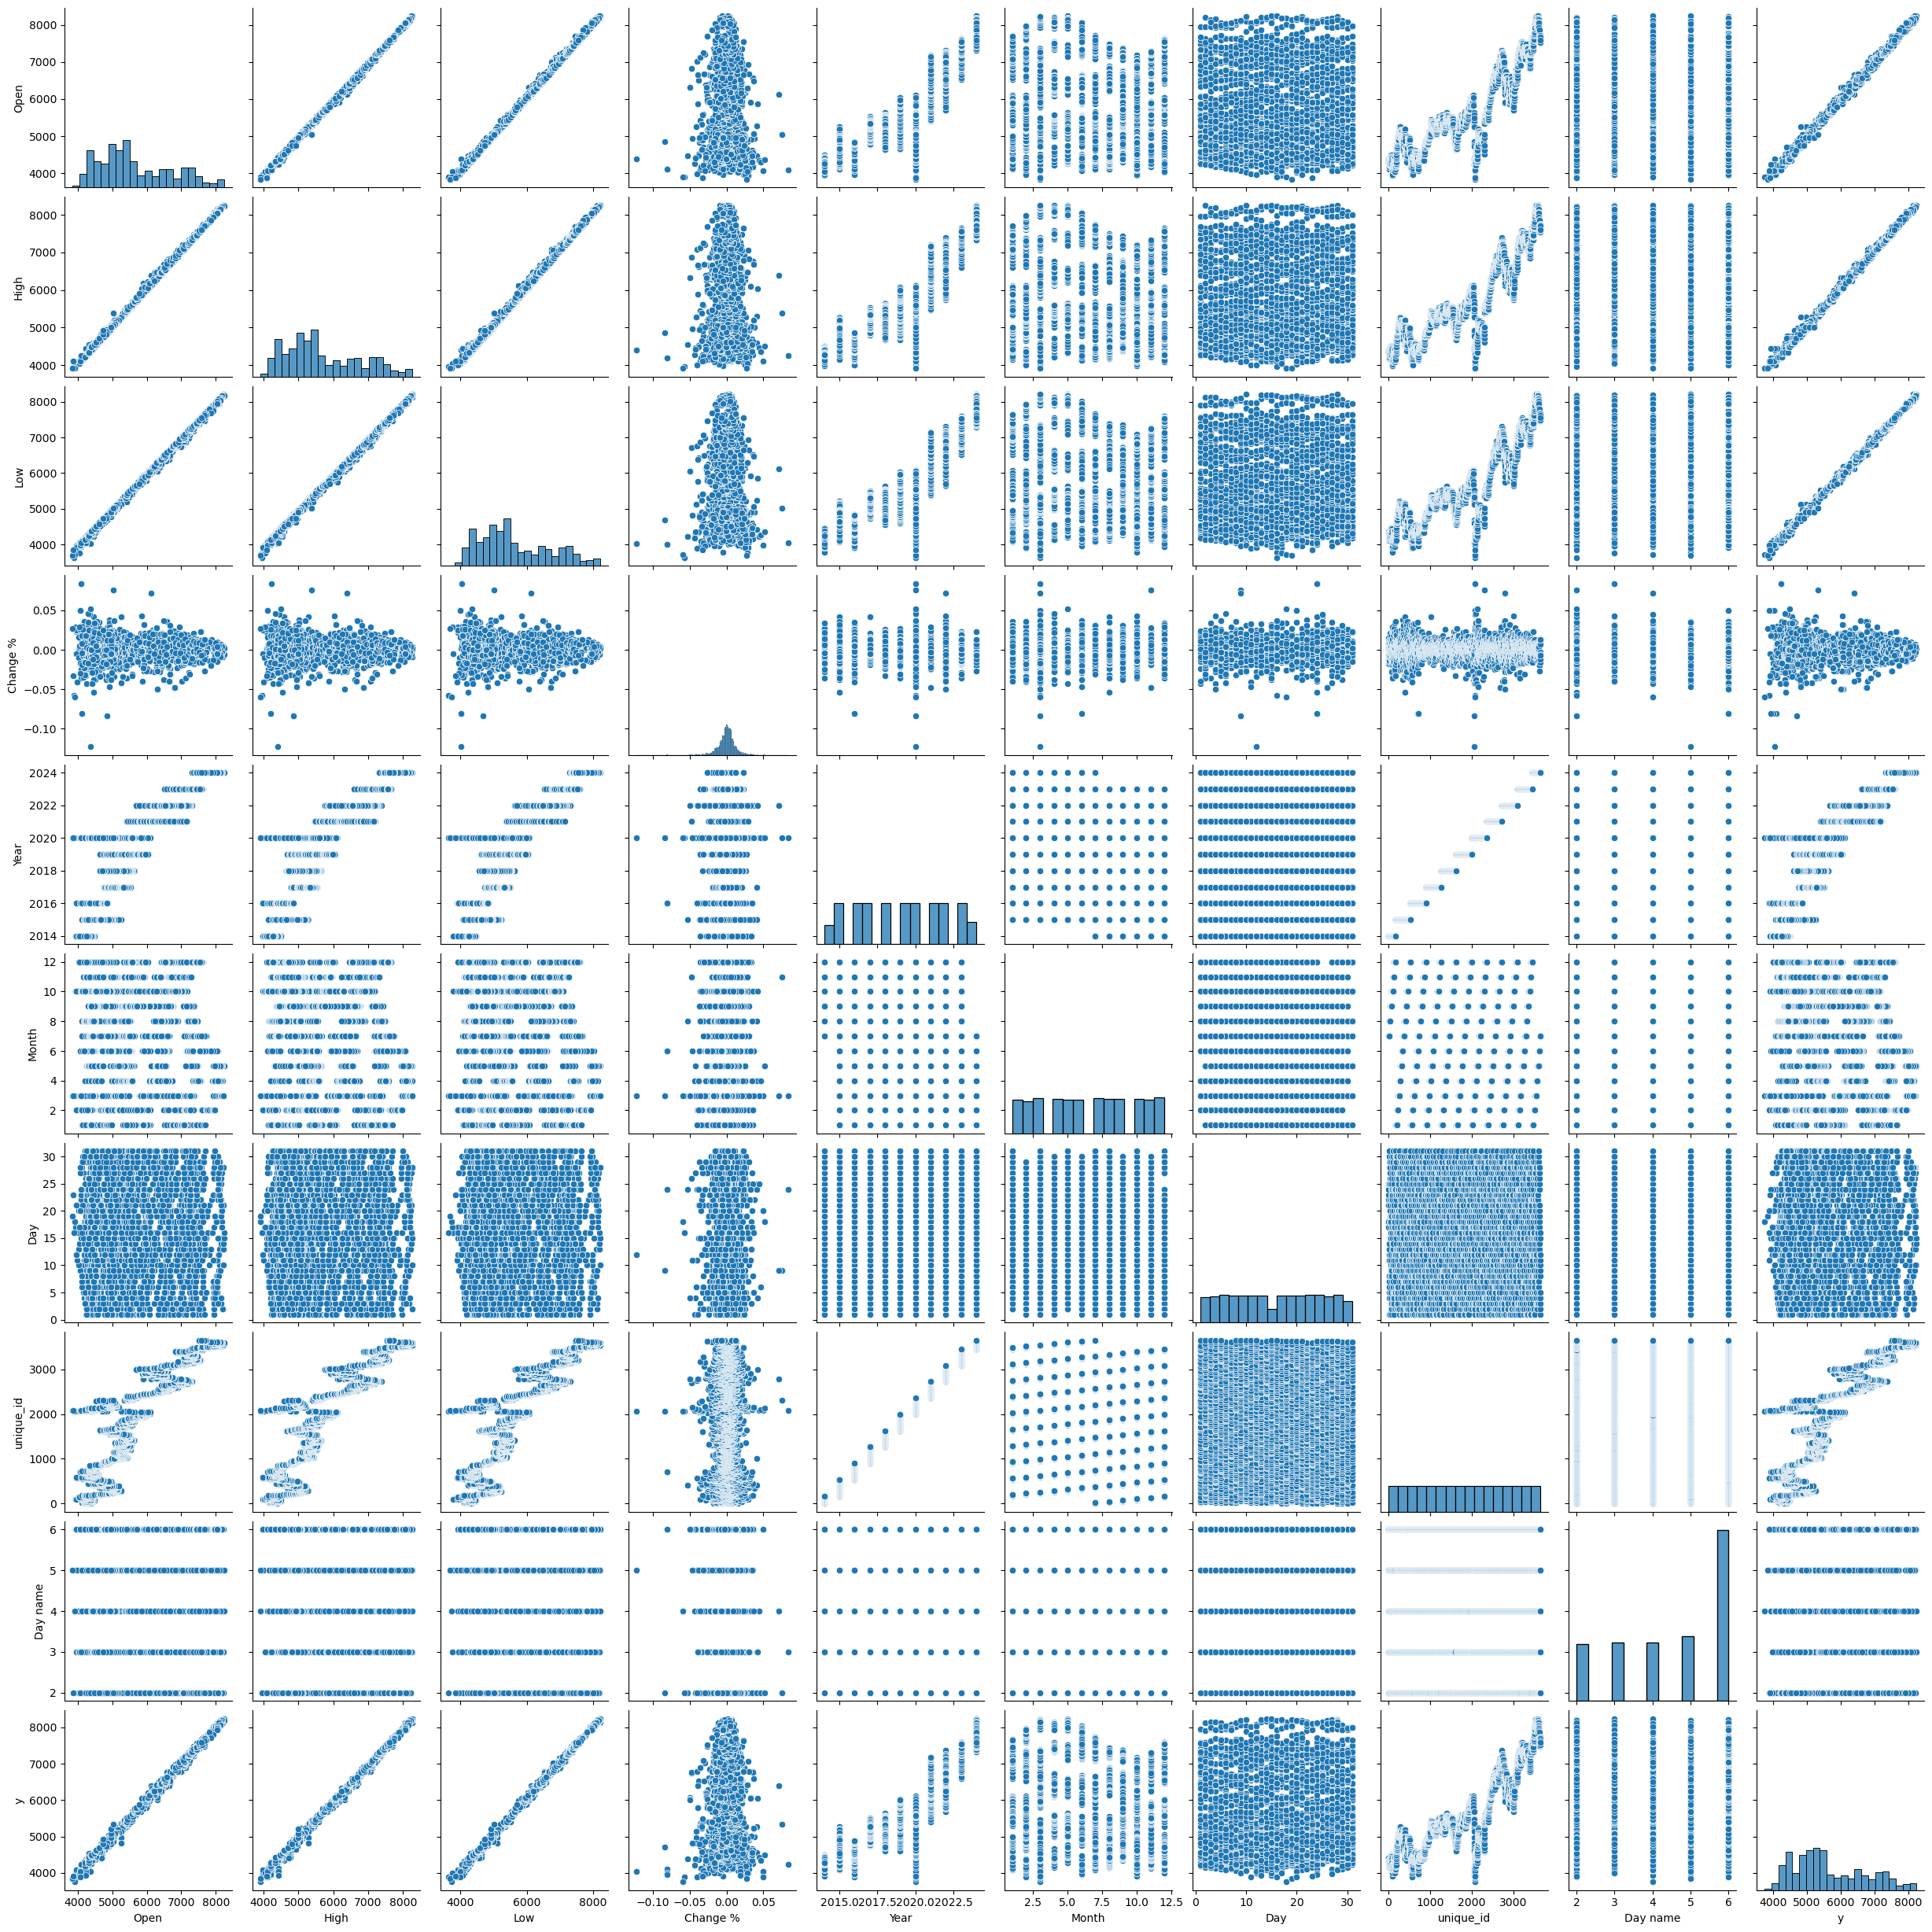

<Figure size 1000x1000 with 0 Axes>

In [22]:
import seaborn as sns

sns.pairplot(data_full)
plt.show()

dpi = 100  # You can adjust this DPI value as needed for better quality

# Save the figure with the desired resolution
plt.savefig('FCHI_CAC_40_Seaborn_Pairplot.png', dpi=dpi)

## Split train & test data

In [23]:
from sklearn.model_selection import train_test_split as TTS
df_dataCol = data_full.drop('y', axis = 1)

X = data_full[df_dataCol.columns]
Y = data_full['y']
# Y = df["Closing Price"] / df["Closing Price"].max()

X_train, X_test, Y_train, Y_test = TTS(X, Y, 
                                       test_size = 0.05, 
                                       random_state = 0,
                                       shuffle=False)

In [24]:
df_train = X_train.join(Y_train)
df_train

ds     Open     High      Low     Vol.  Change %    Year  Month  \
0    2014-07-17  4345.98  4362.28  4311.12  102.51M   -0.0121  2014.0    7.0   
1    2014-07-18  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0   
2    2014-07-19  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0   
3    2014-07-20  4296.84  4335.31  4284.42  111.18M    0.0044  2014.0    7.0   
4    2014-07-21  4334.62  4336.79  4295.36   78.39M   -0.0071  2014.0    7.0   
...         ...      ...      ...      ...      ...       ...     ...    ...   
3465 2024-01-11  7466.11  7479.42  7382.88   57.82M   -0.0052  2024.0    1.0   
3466 2024-01-12  7412.68  7478.66  7408.46   50.30M    0.0105  2024.0    1.0   
3467 2024-01-13  7412.68  7478.66  7408.46   50.30M    0.0105  2024.0    1.0   
3468 2024-01-14  7412.68  7478.66  7408.46   50.30M    0.0105  2024.0    1.0   
3469 2024-01-15  7467.80  7479.27  7401.07   40.57M   -0.0072  2024.0    1.0   

       Day  unique_id  Day name            y  
0     17.0          1       5.0  4316.120000  
1     18.0          2       6.0  4335.310000  
2     18.0          3       6.0  4328.898412  
3     18.0          4       6.0  4308.414831  
4     21.0          5       2.0  4304.740000  
...    ...        ...       ...          ...  
3465  11.0       3466       5.0  7387.620000  
3466  12.0       3467       6.0  7465.140000  
3467  12.0       3468       6.0  7448.235518  
3468  12.0       3469       6.0  7429.140407  
3469  15.0       3470       2.0  7411.680000  

[3470 rows x 12 columns]

In [25]:
df_test = X_test.join(Y_test)
df_test

ds     Open     High      Low    Vol.  Change %    Year  Month  \
3470 2024-01-16  7364.11  7399.29  7343.52  49.82M   -0.0018  2024.0    1.0   
3471 2024-01-17  7313.26  7323.25  7281.10  59.43M   -0.0107  2024.0    1.0   
3472 2024-01-18  7346.71  7409.64  7326.45  51.15M    0.0113  2024.0    1.0   
3473 2024-01-19  7446.82  7446.82  7350.68  51.57M   -0.0040  2024.0    1.0   
3474 2024-01-20  7446.82  7446.82  7350.68  51.57M   -0.0040  2024.0    1.0   
...         ...      ...      ...      ...     ...       ...     ...    ...   
3648 2024-07-12  7664.94  7737.16  7659.09  51.47M    0.0127  2024.0    7.0   
3649 2024-07-13  7664.94  7737.16  7659.09  51.47M    0.0127  2024.0    7.0   
3650 2024-07-14  7664.94  7737.16  7659.09  51.47M    0.0127  2024.0    7.0   
3651 2024-07-15  7682.34  7712.85  7618.73  50.57M   -0.0119  2024.0    7.0   
3652 2024-07-16  7583.50  7603.42  7556.55  41.90M   -0.0069  2024.0    7.0   

       Day  unique_id  Day name            y  
3470  16.0       3471       3.0  7398.000000  
3471  17.0       3472       4.0  7318.690000  
3472  18.0       3473       5.0  7401.350000  
3473  19.0       3474       6.0  7371.640000  
3474  19.0       3475       6.0  7383.286968  
...    ...        ...       ...          ...  
3648  12.0       3649       6.0  7724.320000  
3649  12.0       3650       6.0  7717.094233  
3650  12.0       3651       6.0  7681.192667  
3651  15.0       3652       2.0  7632.710000  
3652  16.0       3653       3.0  7580.030000  

[183 rows x 12 columns]

In [26]:
from statsforecast.adapters.prophet import AutoARIMAProphet
from tqdm import tqdm
import time

start = time.time()
# Initialize the AutoARIMAProphet model configurations
model_config = {
    "growth": "logistic",
    "yearly_seasonality": True,
    # "weekly_seasonality": True,
    # "daily_seasonality" : False,
    # "holidays": holidays_df
    "seasonality_mode": "multiplicative",
    "seasonality_prior_scale": 10,
    "holidays_prior_scale": 10,
    "changepoint_prior_scale": 0.05,
    "interval_width": 0.75,
    "uncertainty_samples": 1000
}

cap = 10
floor = 5.5

# Instantiate models
aap = AutoARIMAProphet(**model_config)
aapM2 = AutoARIMAProphet(**model_config)

df_train['cap'] = cap
df_train['floor'] = floor

# Fit the first model
with tqdm(total=1, desc="Fitting First Model") as pbar:
    aap1 = aap.fit(df_train, disable_seasonal_features=False)
    pbar.update(1)
    
# aap = aap.fit(df_train)
print("Train:", time.time() - start)

combined_df = pd.concat([df_train, df_test])

df_train['cap'] = cap
df_train['floor'] = floor

df_test['cap'] = cap
df_test['floor'] = floor

# with tqdm(total=100, desc="Making Predictions") as pbar:
#     aap_pred_test = aap1.predict(df_test)
#     aap_pred_train = aap1.predict(df_train)
#     pbar.update(100)

combined_df['cap'] = cap
combined_df['floor'] = floor

# Fit the second model
with tqdm(total=1, desc="Fitting Second Model") as pbar:
    aap2 = aapM2.fit(combined_df, disable_seasonal_features=False)
    pbar.update(1)


aap_pred_forecast = aap2.make_future_dataframe(periods = 1826, freq = 'D', include_history = True)
aap_pred_forecast['cap'] = cap
aap_pred_forecast['floor'] = floor

# Making predictions
with tqdm(total=2, desc="Making Predictions") as pbar:
    aap_pred_test = aap1.predict(df_test)
    aap_pred_train = aap1.predict(df_train)
    aap_pred_forecast = aap2.predict(aap_pred_forecast)
    pbar.update(2)

print("Pred:", time.time() - start)

C:\Users\Imman\Documents\anaconda3\Lib\site-packages\statsforecast\core.py:26: TqdmExperimentalWarning:

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)

Fitting First Model:   0%|                                                                       | 0/1 [00:00<?, ?it/s]C:\Users\Imman\Documents\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning:

invalid value encountered in subtract

C:\Users\Imman\Documents\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning:

invalid value encountered in subtract

Fitting First Model: 100%|███████████████████████████████████████████████████████████████| 1/1 [00:18<00:00, 18.58s/it]


Train: 18.850034475326538


Fitting Second Model:   0%|                                                                      | 0/1 [00:00<?, ?it/s]C:\Users\Imman\Documents\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning:

invalid value encountered in subtract

C:\Users\Imman\Documents\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning:

invalid value encountered in subtract

C:\Users\Imman\Documents\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning:

invalid value encountered in subtract

Making Predictions: 100%|████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.56it/s]

Pred: 30.816534519195557


In [27]:
aap_pred_forecast

ds         yhat   yhat_lower    yhat_upper
0    2014-07-17  4311.798717  4255.037791   4368.559642
1    2014-07-18  4321.063260  4264.302335   4377.824186
2    2014-07-19  4340.151414  4283.390489   4396.912340
3    2014-07-20  4329.906671  4273.145745   4386.667596
4    2014-07-21  4309.130520  4252.369595   4365.891446
...         ...          ...          ...           ...
5474 2029-07-12  7553.100080  4822.375604  10283.824556
5475 2029-07-13  7558.045106  4826.571258  10289.518954
5476 2029-07-14  7561.671673  4829.448659  10293.894688
5477 2029-07-15  7564.471568  4831.499592  10297.443543
5478 2029-07-16  7568.730366  4835.009634  10302.451097

[5479 rows x 4 columns]

## MAPE for error metrics

In [28]:
def MAPE(actual, prediction):
    """
    Calculate the Mean Absolute Percentage Error (MAPE) between two lists.
    
    MAPE is a measure of prediction accuracy of a forecasting method in statistics,
    specifically trending markets. It expresses accuracy as a percentage, and is defined
    by the formula: MAPE = (1/n) * Σ(|actual - prediction| / |actual|) * 100
    
    Parameters:
    - actual (list or array-like): The actual data points. Must be 1-dimensional and 
      the same length as 'prediction'.
    - prediction (list or array-like): The predicted data points, which correspond to 
      'actual'. Must be 1-dimensional and the same length as 'actual'.

    Returns:
    - float: The mean absolute percentage error (MAPE) as a percentage, rounded to two decimal places.
    """
    actual, prediction = np.array(actual), np.array(prediction)
    if np.any(actual == 0):
        raise ValueError("MAPE is undefined for zero actual values because of division by zero")
    mape = np.mean(np.abs((actual - prediction) / actual)) * 100
    return round(mape, 2)

## Visualisation

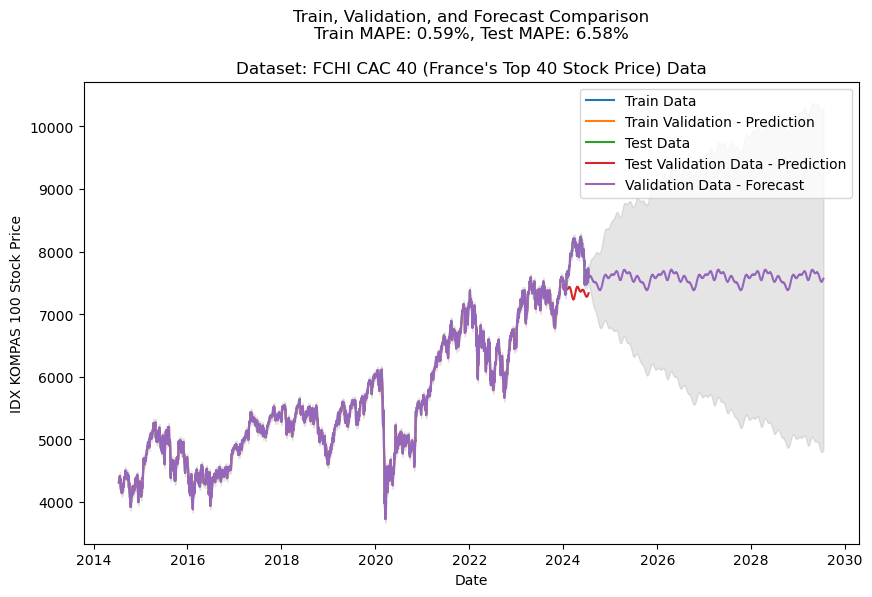

<Figure size 1000x1000 with 0 Axes>

In [29]:
plt.figure(figsize=(10, 6))

plt.plot(df_train['ds'], df_train['y'], label='Train Data')
plt.plot(aap_pred_train['ds'], aap_pred_train['yhat'], label='Train Validation - Prediction')

plt.plot(df_test['ds'], df_test['y'], label='Test Data')
plt.plot(aap_pred_test['ds'], aap_pred_test['yhat'], label='Test Validation Data - Prediction')

# plt.plot(df_test['ds'], df_test['y'], label='Test Data')
plt.plot(aap_pred_forecast['ds'], aap_pred_forecast['yhat'], label='Validation Data - Forecast')


plt.fill_between(aap_pred_forecast['ds'], aap_pred_forecast['yhat_lower'], aap_pred_forecast['yhat_upper'], color='gray', alpha=0.2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('IDX KOMPAS 100 Stock Price')
mape_train = MAPE(df_train['y'], aap_pred_train['yhat'])
mape_test = MAPE(df_test['y'], aap_pred_test['yhat'])
# mape_forecast = MAPE(df_test['y'], aap_pred_forecast['yhat'])

# Dataset name
dataset_name = "FCHI CAC 40 (France's Top 40 Stock Price) Data"

# Add MAPE and dataset name to the title with improved spacing
plt.title(f'Train, Validation, and Forecast Comparison\n'
          f'Train MAPE: {mape_train}%, Test MAPE: {mape_test}%\n\n'
          f'Dataset: {dataset_name}')
plt.show()

dpi = 100  # You can adjust this DPI value as needed for better quality

# Save the figure with the desired resolution
plt.savefig('FCHI_CAC_40_General_Plot.png', dpi=dpi)

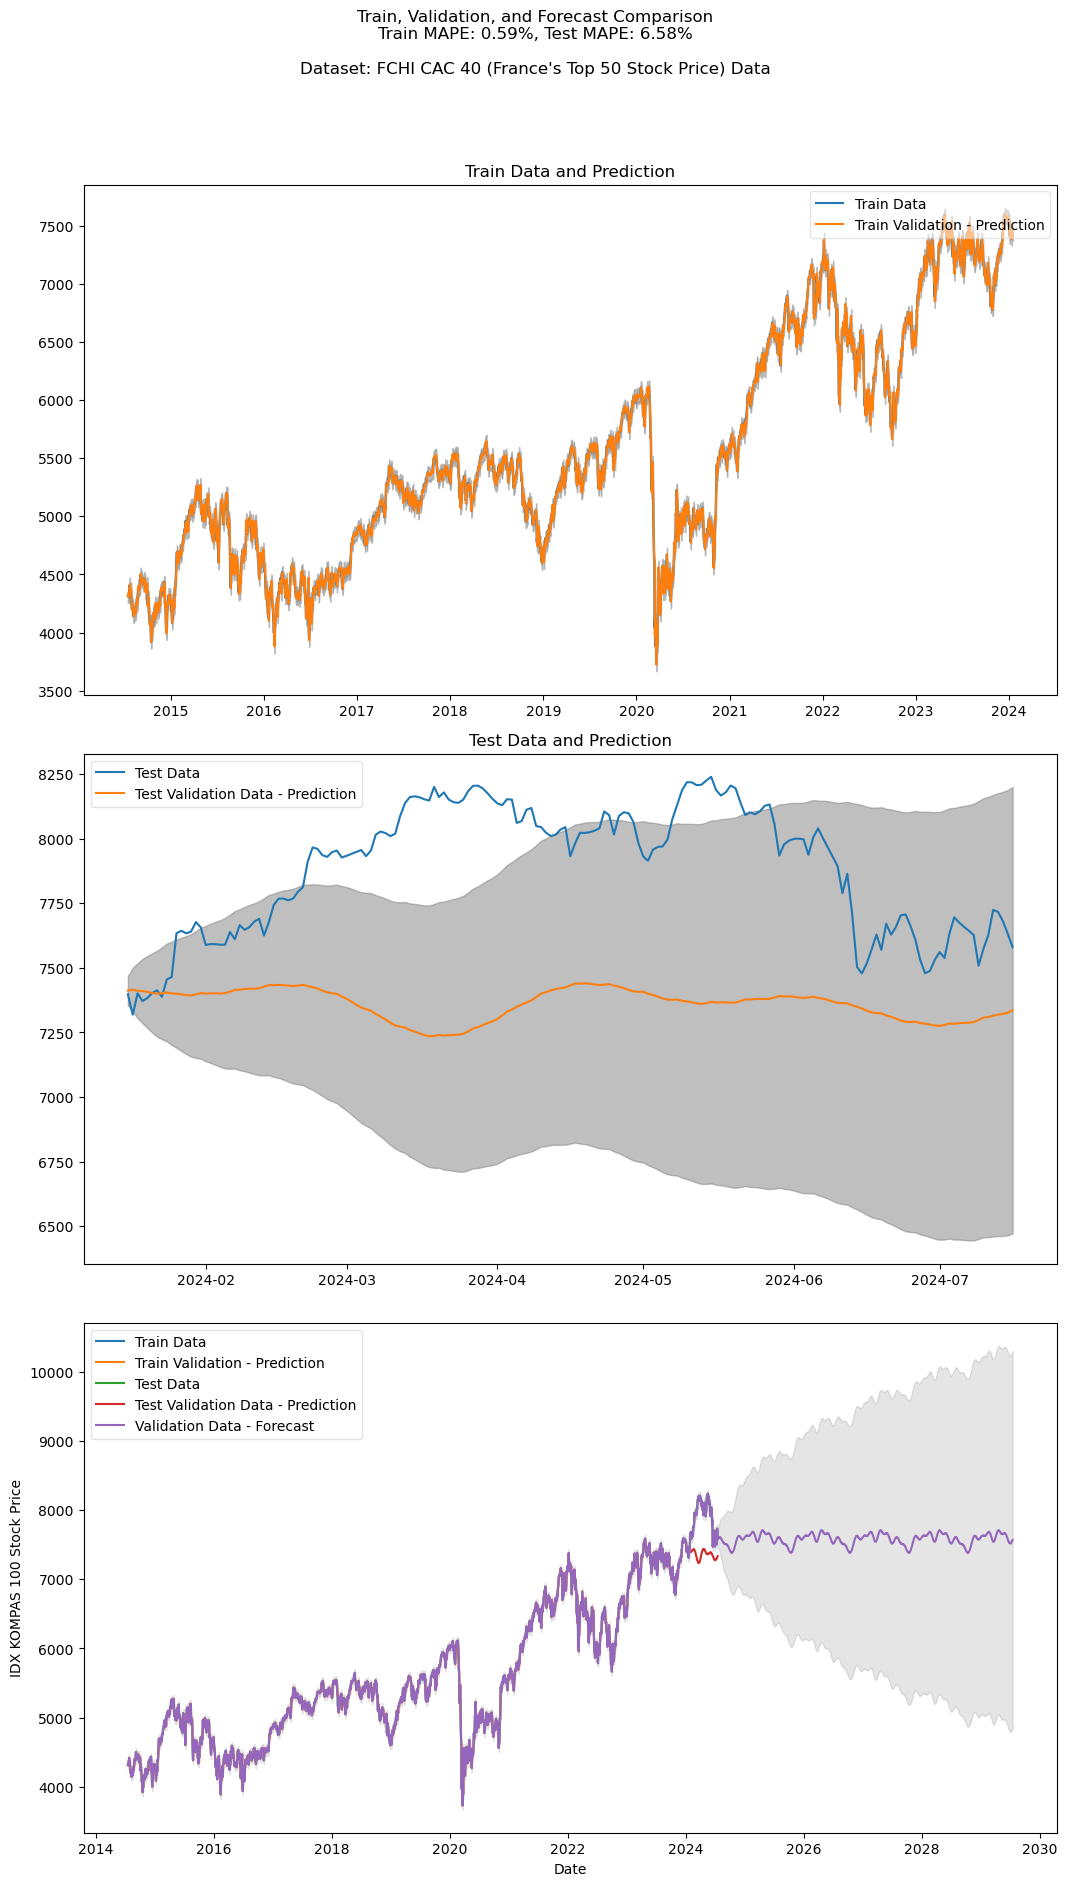

In [30]:
import matplotlib.pyplot as plt

# Set the DPI for 1920x1080 resolution
dpi = 100  # You can adjust this DPI value as needed for better quality

# Create a figure and 3 subplots, with minimal spacing
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10.8, 19.2), sharex=False)

# Adjust the spacing between plots
plt.subplots_adjust(hspace=0.3)  # Adjust horizontal spacing

# --------------------- First Plot (Top Plot) -------------------------------------------
ax1.plot(df_train['ds'], df_train['y'], label='Train Data')
ax1.plot(aap_pred_train['ds'], aap_pred_train['yhat'], label='Train Validation - Prediction')
ax1.fill_between(aap_pred_train['ds'], aap_pred_train['yhat_lower'], aap_pred_train['yhat_upper'], color='gray', alpha=0.5)
ax1.legend(loc='upper right', fontsize='medium', fancybox=True, framealpha=0.5)
ax1.set_title('Train Data and Prediction')

# --------------------- Second Plot (Middle Plot) ---------------------------------------
ax2.plot(df_test['ds'], df_test['y'], label='Test Data')
ax2.plot(aap_pred_test['ds'], aap_pred_test['yhat'], label='Test Validation Data - Prediction')
ax2.fill_between(aap_pred_test['ds'], aap_pred_test['yhat_lower'], aap_pred_test['yhat_upper'], color='gray', alpha=0.5)
ax2.legend(loc='upper left', fontsize='medium', fancybox=True, framealpha=0.5)
ax2.set_title('Test Data and Prediction')

# --------------------- Third Plot (Bottom Plot) -----------------------------------------
ax3.plot(df_train['ds'], df_train['y'], label='Train Data')
ax3.plot(aap_pred_train['ds'], aap_pred_train['yhat'], label='Train Validation - Prediction')
ax3.plot(df_test['ds'], df_test['y'], label='Test Data')
ax3.plot(aap_pred_test['ds'], aap_pred_test['yhat'], label='Test Validation Data - Prediction')
ax3.plot(aap_pred_forecast['ds'], aap_pred_forecast['yhat'], label='Validation Data - Forecast')
ax3.fill_between(aap_pred_forecast['ds'], aap_pred_forecast['yhat_lower'], aap_pred_forecast['yhat_upper'], color='gray', alpha=0.2)
ax3.legend(loc='upper left', fontsize='medium', fancybox=True, framealpha=0.5)
ax3.set_xlabel('Date')
ax3.set_ylabel('IDX KOMPAS 100 Stock Price')
mape_train = MAPE(df_train['y'], aap_pred_train['yhat'])
mape_test = MAPE(df_test['y'], aap_pred_test['yhat'])
# mape_forecast = MAPE(df_test['y'], aap_pred_forecast['yhat'])

# Dataset name
dataset_name = "FCHI CAC 40 (France's Top 50 Stock Price) Data"

# Add MAPE and dataset name to the title with improved spacing
plt.suptitle(f'Train, Validation, and Forecast Comparison\n'
             f'Train MAPE: {mape_train}%, Test MAPE: {mape_test}%\n\n'
             f'Dataset: {dataset_name}', y=0.98)  # Adjust the y position

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the bottom and top space

# Save the figure with the desired resolution
plt.savefig('FCHI_CAC_40_All_Plots.png', dpi=dpi)

# Show the plot
plt.show()

## FCHI CAC 40 Forecast Data for the next 10 years

In [31]:
aap_pred_forecast

ds         yhat   yhat_lower    yhat_upper
0    2014-07-17  4311.798717  4255.037791   4368.559642
1    2014-07-18  4321.063260  4264.302335   4377.824186
2    2014-07-19  4340.151414  4283.390489   4396.912340
3    2014-07-20  4329.906671  4273.145745   4386.667596
4    2014-07-21  4309.130520  4252.369595   4365.891446
...         ...          ...          ...           ...
5474 2029-07-12  7553.100080  4822.375604  10283.824556
5475 2029-07-13  7558.045106  4826.571258  10289.518954
5476 2029-07-14  7561.671673  4829.448659  10293.894688
5477 2029-07-15  7564.471568  4831.499592  10297.443543
5478 2029-07-16  7568.730366  4835.009634  10302.451097

[5479 rows x 4 columns]

In [32]:
MAPE(df_train['y'], aap_pred_train['yhat'])
MAPE(df_test['y'], aap_pred_test['yhat'])

print("Train Error: ", MAPE(df_train['y'], aap_pred_train['yhat']), "\n Test Error: ", MAPE(df_test['y'], aap_pred_test['yhat']))

Train Error:  0.59 
 Test Error:  6.58
